# ScoreSight - Match Winner Prediction (EDA & Preprocessing)
Author: Rishi Khandekar  
Internship: Infosys  
Goal: Prepare dataset for Match Winner classification (Win/Draw/Loss)

In [1]:
!pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Set visualization style
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

In [3]:
# Load Dataset
df = pd.read_csv("Match Winner.csv")
print("Shape of dataset:", df.shape)
display(df.head())

Shape of dataset: (9380, 22)


,Season,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
0,2000/01,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,14,4,6,6,13,12,1,2,0,0
1,2000/01,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,10,5,7,7,19,14,1,2,0,0
2,2000/01,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,...,3,9,8,4,15,21,5,3,1,0
3,2000/01,2000-08-19,Derby,Southampton,2,2,D,1,2,A,...,4,6,5,8,11,13,1,1,0,0
4,2000/01,2000-08-19,Leeds,Everton,2,0,H,2,0,H,...,8,6,6,4,21,20,1,3,0,0


In [4]:
# Data Cleaning - Drop leakage/unnecessary columns
drop_cols = [
    "Season", "MatchDate",
    "FullTimeHomeGoals", "FullTimeAwayGoals",
    "HalfTimeHomeGoals", "HalfTimeAwayGoals", "HalfTimeResult"
]
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

print("Remaining Columns:", df.columns.tolist())
print("\nMissing values per column:")
print(df.isnull().sum())

Remaining Columns: ['HomeTeam', 'AwayTeam', 'FullTimeResult', 'HomeShots', 'AwayShots', 'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners', 'HomeFouls', 'AwayFouls', 'HomeYellowCards', 'AwayYellowCards', 'HomeRedCards', 'AwayRedCards']

Missing values per column:
HomeTeam             0
AwayTeam             0
FullTimeResult       0
HomeShots            0
AwayShots            0
HomeShotsOnTarget    0
AwayShotsOnTarget    0
HomeCorners          0
AwayCorners          0
HomeFouls            0
AwayFouls            0
HomeYellowCards      0
AwayYellowCards      0
HomeRedCards         0
AwayRedCards         0
dtype: int64


In [5]:
# Target & Feature Split
target = "FullTimeResult"
X = df.drop(columns=[target])
y = df[target]

print("Target distribution:\n", y.value_counts())

# Encode target labels (H=Home, D=Draw, A=Away)
label_enc = LabelEncoder()
y_encoded = label_enc.fit_transform(y)

Target distribution:
 FullTimeResult
H    4299
A    2768
D    2313
Name: count, dtype: int64


In [6]:
# Encoding Categorical Features (Teams)
X_encoded = pd.get_dummies(X, columns=["HomeTeam", "AwayTeam"], drop_first=True)
print("Shape after encoding:", X_encoded.shape)

Shape after encoding: (9380, 102)


In [7]:
# Outlier Detection (IQR Method)
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

numeric_cols = X_encoded.select_dtypes(include=np.number).columns
for col in list(numeric_cols)[:5]:
    print(f"{col}: {len(detect_outliers_iqr(X_encoded, col))} outliers")

HomeShots: 129 outliers
AwayShots: 81 outliers
HomeShotsOnTarget: 148 outliers
AwayShotsOnTarget: 325 outliers
HomeCorners: 99 outliers


C:\Users\rishi\AppData\Local\Temp\ipykernel_7612\3877110252.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="muted", hue=None)


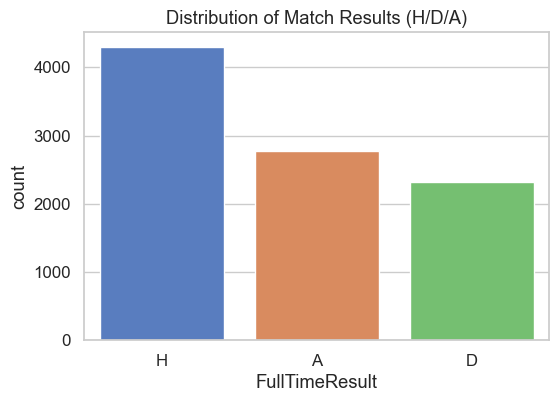

In [8]:
# EDA - Target distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="muted", hue=None)
plt.title("Distribution of Match Results (H/D/A)")
plt.show()

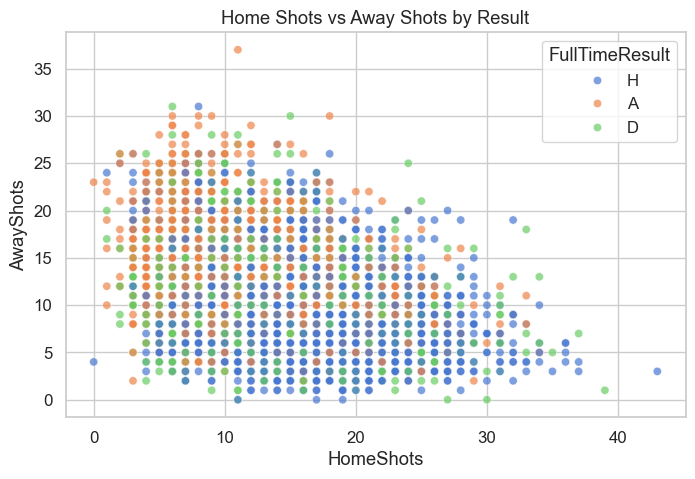

In [9]:
# EDA - Home vs Away shots
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="HomeShots", y="AwayShots", hue=y, alpha=0.7, palette="muted")
plt.title("Home Shots vs Away Shots by Result")
plt.show()

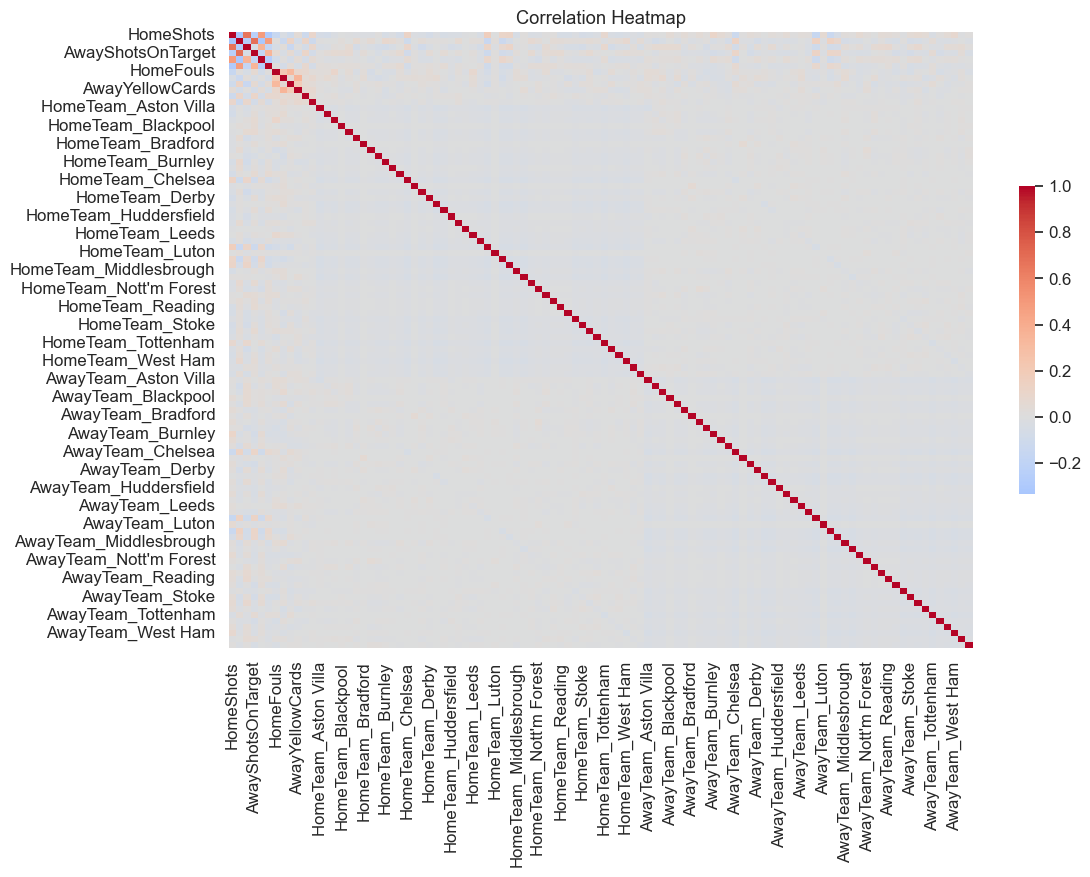

In [10]:
# EDA - Correlation Heatmap
plt.figure(figsize=(12,8))
corr = X_encoded.corr()
sns.heatmap(corr, cmap="coolwarm", center=0, cbar_kws={'shrink':0.5})
plt.title("Correlation Heatmap")
plt.show()

C:\Users\rishi\AppData\Local\Temp\ipykernel_7612\2266122647.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=df["HomeRedCards"], palette="Set2", hue=None)


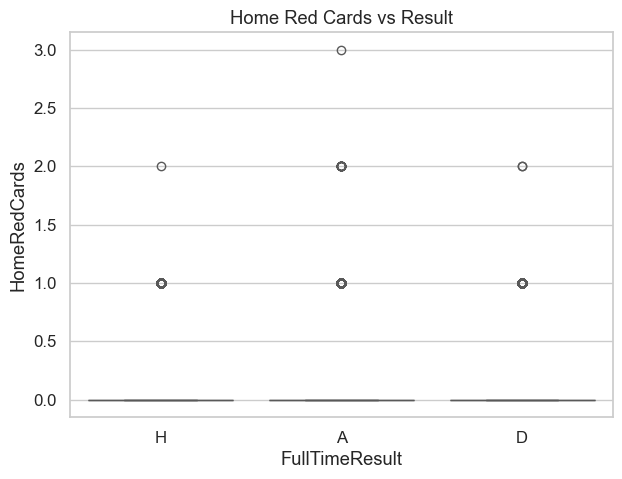

In [11]:
# EDA - Red cards vs Result
plt.figure(figsize=(7,5))
sns.boxplot(x=y, y=df["HomeRedCards"], palette="Set2", hue=None)
plt.title("Home Red Cards vs Result")
plt.show()

In [12]:
# Train-Test Split (Setup)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (7504, 102)
Test shape: (1876, 102)


Classification Report (Dummy):

              precision    recall  f1-score   support

           A       0.29      0.33      0.31       554
           D       0.23      0.31      0.26       462
           H       0.45      0.33      0.38       860

    accuracy                           0.32      1876
   macro avg       0.32      0.32      0.32      1876
weighted avg       0.35      0.32      0.33      1876



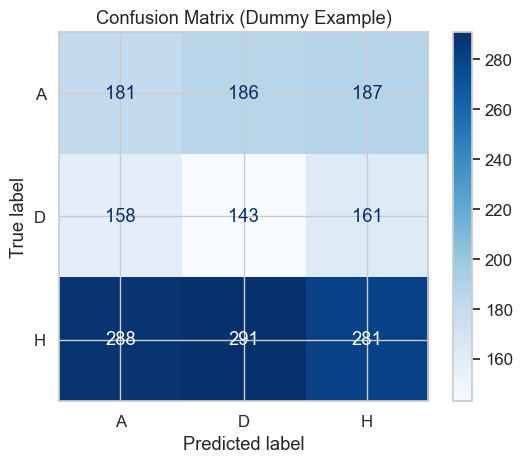

In [13]:
# Evaluation Template (Dummy Example)
rng = np.random.default_rng(42)
dummy_preds = rng.choice(np.unique(y_encoded), size=len(y_test))

print("Classification Report (Dummy):\n")
print(classification_report(y_test, dummy_preds, target_names=label_enc.classes_))

cm = confusion_matrix(y_test, dummy_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_enc.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Dummy Example)")
plt.show()